In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
import umap




In [3]:
data = pd.read_csv('../data/data.csv')
gene_types = data['gene_type'].unique()

selected_gene_types = []
for gene_type in gene_types:
  df = data[data['gene_type'] == gene_type]
  #filter out gene types with low sample count 
  if len(df) >= 1000:
    selected_gene_types.append(gene_type)
selected_gene_types.remove('miRNA')
data = data.T 
data = data.drop(data.index[:3])
selected_gene_types

['protein_coding',
 'pseudogene',
 'antisense',
 'lincRNA',
 'misc_RNA',
 'snRNA',
 'snoRNA']

In [7]:
data = data.T 
data = data.drop(data.index[:3])
data

,0,1,2,3,4,5,6,7,8,9,...,57905,57906,57907,57908,57909,57910,57911,57912,57913,57914
BC01_Pooled,2.33,0.0,60.7,47.93,4.79,0.0,0.06,46.54,11.61,9.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14940.7,985.82,0.0
BC01_Tumor,1.25,0.0,28.44,4.43,1.67,0.0,9.64,20.97,5.97,4.81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45728.19,607.5,0.0
BC02_Pooled,43.96,0.0,74.73,9.89,10.87,0.52,0.0,46.3,8.72,19.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10442.91,362.55,0.0
BC03_Pooled,7.64,0.0,41.41,7.61,0.92,0.0,0.0,8.57,5.51,0.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94250.71,2949.35,0.0
BC03LN_Pooled,9.32,0.0,87.69,7.32,15.13,1.39,0.0,5.72,10.0,27.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40823.13,1291.13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC11_69,0.0,0.0,0.0,0.27,0.14,0.0,0.0,7.06,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58840.26,2286.91,0.0
BC11_70,0.0,0.0,0.0,0.0,247.69,0.0,0.81,4.49,0.0,53.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65246.34,2821.49,0.0
BC11_78,0.0,0.0,136.07,0.07,22.6,0.0,0.83,0.82,70.26,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33465.11,1652.19,0.0
BC11_81,200.82,0.0,22.03,0.19,11.35,0.0,0.0,4.32,1.12,6.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108901.35,3439.53,0.0


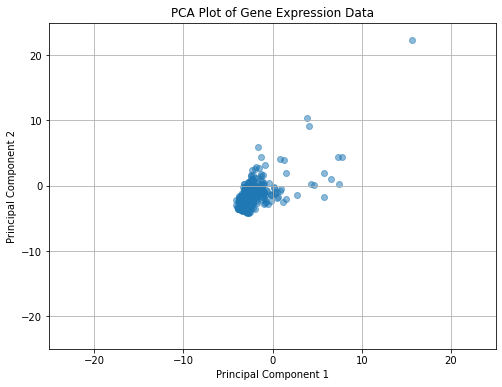

In [18]:
def plt_PCA(data):
  '''PCA'''
  # Standardize the gene expression data (mean=0 and variance=1)
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(data)

  # Apply PCA
  pca = PCA(n_components=2)  # Number of components for visualization (2 for 2D plot)
  pca_result = pca.fit_transform(scaled_data)

  # Create a DataFrame from PCA result for easy plotting
  pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])  # Change column names accordingly

  # Plot PCA results
  plt.figure(figsize=(8, 6))
  plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title('PCA Plot of Gene Expression Data')
  plt.grid(True)
  plt.ylim(-25,25)
  plt.xlim(-25,25)
  plt.show()
plt_PCA(data)


d:\CS Software\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\CS Software\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


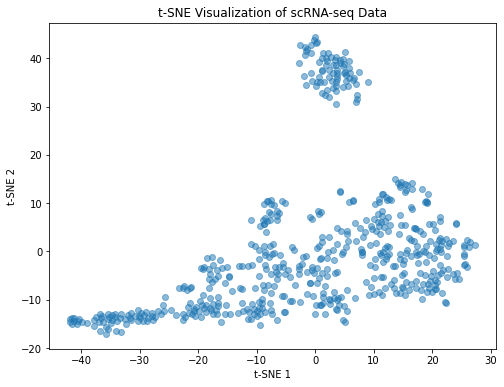

In [22]:
def plt_tsne(data):
  '''TSNE'''
  selected_columns = data

  tsne = TSNE(n_components=2, perplexity=30)  # Adjust parameters as needed

  # Perform t-SNE
  tsne_result = tsne.fit_transform(selected_columns)

  # Convert t-SNE result to a DataFrame for visualization
  tsne_df = pd.DataFrame(tsne_result, columns=['tsne_1', 'tsne_2'])

  # Plot the t-SNE result
  plt.figure(figsize=(8, 6))
  plt.scatter(tsne_df['tsne_1'], tsne_df['tsne_2'], alpha=0.5)
  plt.title('t-SNE Visualization of scRNA-seq Data')
  plt.xlabel('t-SNE 1')
  plt.ylabel('t-SNE 2')
  plt.show()


plt_tsne(data)

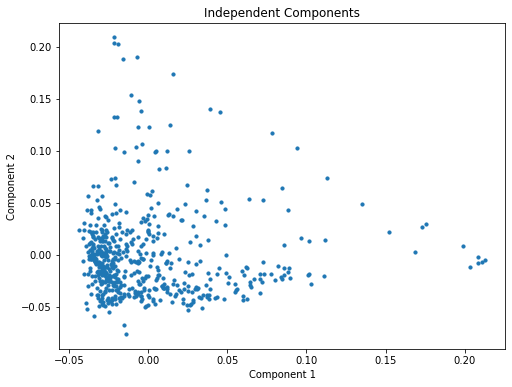

In [4]:
'''ICA'''

def plt_ICA(data):
  gene_expression = data

  # Assuming you have your data loaded into a variable named 'data'
  # Replace this with your actual data loading process

  # Create an ICA object
  ica = FastICA(n_components=2, random_state=42)

  # Fit the ICA model to your data
  ica.fit(gene_expression)

  # Transform the gene_expression to the independent components
  independent_components = ica.transform(gene_expression)

  # Plot the independent components (assuming it's 2D)
  plt.figure(figsize=(8, 6))
  plt.scatter(independent_components[:, 0], independent_components[:, 1], s=10)
  plt.title('Independent Components')
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.show()

plt_ICA(data)

Epoch 1/20
18/18 [==============================] - 5s 225ms/step - loss: 13193.5273
Epoch 2/20
18/18 [==============================] - 4s 221ms/step - loss: 8928.6328
Epoch 3/20
18/18 [==============================] - 4s 221ms/step - loss: 2528.7175
Epoch 4/20
18/18 [==============================] - 4s 213ms/step - loss: 311.6412
Epoch 5/20
18/18 [==============================] - 4s 218ms/step - loss: 142.7249
Epoch 6/20
18/18 [==============================] - 4s 208ms/step - loss: 118.1219
Epoch 7/20
18/18 [==============================] - 4s 215ms/step - loss: 114.2354
Epoch 8/20
18/18 [==============================] - 4s 221ms/step - loss: 68.7381
Epoch 9/20
18/18 [==============================] - 4s 215ms/step - loss: 59.6940
Epoch 10/20
18/18 [==============================] - 4s 221ms/step - loss: 47.8848
Epoch 11/20
18/18 [==============================] - 4s 227ms/step - loss: 43.0340
Epoch 12/20
18/18 [==============================] - 4s 228ms/step - loss: 35.0989
Ep

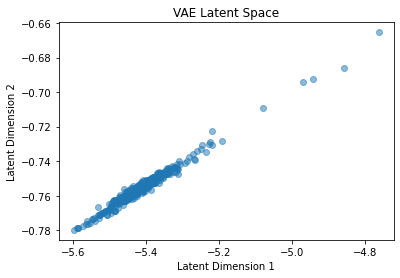

In [6]:
'''VAE'''

def plt_VAE(data):
    # Extract the expression data (assuming it starts from the 4th column)
    expression_data = data.values

    # Normalize the data
    expression_data = (expression_data - np.min(expression_data)) / (np.max(expression_data) - np.min(expression_data))
    expression_data = tf.convert_to_tensor(expression_data, dtype=tf.float32)
    # Define the VAE architecture
    latent_dim = 2  # Set the number of latent dimensions

    # Encoder
    encoder_inputs = keras.Input(shape=(expression_data.shape[1],))
    x = keras.layers.Dense(256, activation='relu')(encoder_inputs)
    x = keras.layers.Dense(128, activation='relu')(x)
    z_mean = keras.layers.Dense(latent_dim, name='z_mean')(x)
    z_log_var = keras.layers.Dense(latent_dim, name='z_log_var')(x)

    # Reparameterization trick to sample from the latent space
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = tf.keras.backend.random_normal(shape=(tf.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = keras.layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    decoder_inputs = keras.layers.Dense(128, activation='relu')(z)
    decoder_outputs = keras.layers.Dense(expression_data.shape[1], activation='sigmoid')(decoder_inputs)

    # Define the VAE model
    vae = keras.Model(encoder_inputs, decoder_outputs)

    # Define the VAE loss
    reconstruction_loss = tf.keras.losses.mean_squared_error(encoder_inputs, decoder_outputs)
    reconstruction_loss *= expression_data.shape[1]
    kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
    kl_loss = tf.reduce_mean(kl_loss)
    kl_loss *= -0.5
    vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)

    # Compile the VAE model
    vae.compile(optimizer='adam')

    # Train the VAE model
    vae.fit(expression_data, epochs=20, batch_size=32)

    # Encode data into the latent space
    encoder = keras.Model(encoder_inputs, z_mean)
    encoded_data = encoder.predict(expression_data)

    # Visualize the latent space
    plt.scatter(encoded_data[:, 0], encoded_data[:, 1], alpha=0.5)
    plt.title('VAE Latent Space')
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.show()
plt_VAE(data)

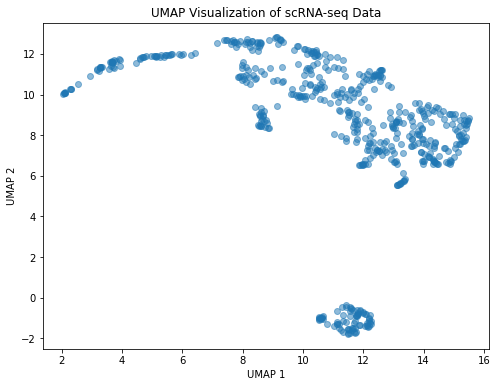

In [16]:
def plt_umap(data):
  selected_columns = data 
  umap_reducer = umap.UMAP(n_components=2)  

  umap_result = umap_reducer.fit_transform(selected_columns)

  umap_df = pd.DataFrame(umap_result, columns=['umap_1', 'umap_2'])

  plt.figure(figsize=(8, 6))
  plt.scatter(umap_df['umap_1'], umap_df['umap_2'], alpha=0.5)
  plt.title('UMAP Visualization of scRNA-seq Data')
  plt.xlabel('UMAP 1')
  plt.ylabel('UMAP 2')
  plt.show()

plt_umap(data)
